In [8]:
#Import all the required libraries
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

In [16]:
#Define the input function
ip = np.expand_dims(np.arange(-1.5, 1.5, 0.01),1)
op = np.sinc(5*ip)

FUNCTION USED

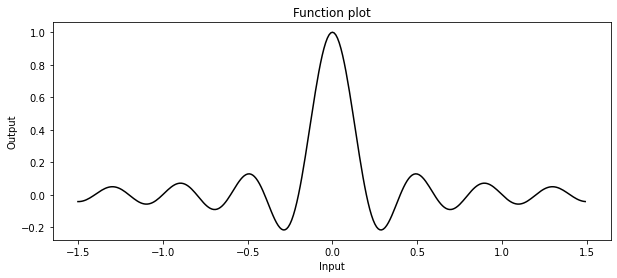

In [10]:
#Plot the function
x = torch.tensor(ip, dtype=torch.float32)
y = torch.tensor(op, dtype=torch.float32)
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "black")
plt.title('Function plot')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

MODEL DEFINITION

In [11]:
#Define the model
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear_1 = nn.Linear(1, 4)
        self.linear_2 = nn.Linear(4, 9)
        self.linear_3 = nn.Linear(9, 12)
        self.linear_4 = nn.Linear(12, 10)
        self.linear_5 = nn.Linear(10, 10)
        self.linear_6 = nn.Linear(10, 10)
        self.linear_7 = nn.Linear(10, 4)
        self.predict = nn.Linear(4, 1)
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear_1(x))
        x = nn.functional.leaky_relu(self.linear_2(x))
        x = nn.functional.leaky_relu(self.linear_3(x))
        x = nn.functional.leaky_relu(self.linear_4(x))
        x = nn.functional.leaky_relu(self.linear_5(x))
        x = nn.functional.leaky_relu(self.linear_6(x))
        x = nn.functional.leaky_relu(self.linear_7(x))

        x = self.predict(x)
        return x
    
model = Model()
total_params = sum(p.numel() for p in model.parameters())
print('Total parameters: ', total_params)

Total parameters:  572


In [12]:
#Define the training model function
def train_model(model, x, y):
    epoch_size = 4000
    loss_arr = []
    epoch_arr = []
    grad_arr = []
    converged = False
    min_grad = 0
    loss_val = 0
    
    for epoch in range(epoch_size):
        if converged:
            return epoch_arr, loss_arr, y_prediction, grad_arr

        y_prediction = model(x)
        lossm_val = 0.001
        loss = loss_func(y_prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())
      
        grad_all = 0.0
        for p in model.parameters():
            grad = 0.0
            if p.grad is not None:
                grad = (p.grad.cpu().data.numpy()**2).sum()
            grad_all += grad
        grad_norm = grad_all ** 0.5
        
        grad_arr.append(grad_norm)
        
        total_params = sum(p.numel() for p in model.parameters())
        if grad_norm < 0.001 or epoch == epoch_size - 1:
            print('Gradient norm reached minimum value')
            predicted_y = model(x)
            lossm = loss_func(predicted_y, y)
            H = torch.zeros((total_params, total_params))

            Jacob = torch.autograd.grad(lossm, list(model.parameters()), create_graph=True)
            Jacob = torch.cat([e.flatten() for e in Jacob]) # flatten
            for i in range(total_params):
                result = torch.autograd.grad(Jacob[i], list(model.parameters()), retain_graph=True)
                H[i] = torch.cat([r.flatten() for r in result]) # flatten
            
            # Use torch.linalg.eigvalsh instead of torch.symeig
            H_eig = torch.linalg.eigvalsh(H)
            
            positive_count = (H_eig > 0).sum().item()
            minimal_ratio = positive_count / H.shape[0]
            print('Minimal Ratio - ', minimal_ratio, ' , Loss - ', lossm.item(), ' Epoch - ', epoch)
            lossm_val = lossm.item()
            break
            
    return lossm_val, minimal_ratio

In [13]:
#Train the model
loss_arr = []
min_ratio_arr = []
for index in range(100):
    print("Training model ", index)
    model = Model()
    loss_func = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-5)

    loss_value, min_ratio = train_model(model, x, y)
    loss_arr.append(loss_value)
    min_ratio_arr.append(min_ratio)

Training model  0
Gradient norm reached minimum value
Minimal Ratio -  0.5034965034965035  , Loss -  0.058609738945961  Epoch -  277
Training model  1
Gradient norm reached minimum value
Minimal Ratio -  0.5017482517482518  , Loss -  0.06131470948457718  Epoch -  123
Training model  2
Gradient norm reached minimum value
Minimal Ratio -  0.5  , Loss -  0.06123689189553261  Epoch -  85
Training model  3
Gradient norm reached minimum value
Minimal Ratio -  0.5297202797202797  , Loss -  0.002248134696856141  Epoch -  709
Training model  4
Gradient norm reached minimum value
Minimal Ratio -  0.5472027972027972  , Loss -  0.0011370877036824822  Epoch -  832
Training model  5
Gradient norm reached minimum value
Minimal Ratio -  0.5034965034965035  , Loss -  0.06119481474161148  Epoch -  456
Training model  6
Gradient norm reached minimum value
Minimal Ratio -  0.5227272727272727  , Loss -  0.002249967772513628  Epoch -  649
Training model  7
Gradient norm reached minimum value
Minimal Ratio -

PLOT OF THE GRAPH

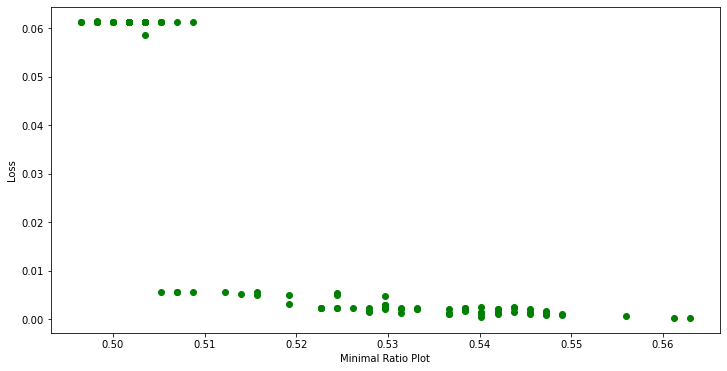

In [17]:
#Plot the graph for minimal ratio
plt.figure(figsize=(12,6))
plt.scatter(min_ratio_arr,loss_arr, color = "green")
plt.xlabel("Minimal Ratio Plot")
plt.ylabel("Loss")
plt.show()